<a href="https://colab.research.google.com/github/Igirisu861/SmartDataProcessing/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Natural Language Processing (NLP)**
---


## **Import NLTK and download packages**

In [1]:
import nltk

In [2]:
nltk.download_shell(

)

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


      Unzipping corpora/stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [3]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

## **Retrieve the data**

We open this like this because tabs in the dataset prevent pandas from reading it properly

In [4]:
with open('/content/SMSSpamCollection') as file:
  msg = [line.rstrip() for line in file]

In [5]:
msg[2]

"spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

A simple for for visualizing the first 10 messages

In [71]:
for msgNum, msg in enumerate(msg[4028:4038]):
  print(msgNum, msg)
  print('\n')

## **Exploratory Analysis**


First we have to add this CSV to a data frame using pandas

In [7]:
import pandas as pd

In [8]:
messages = pd.read_csv('/content/SMSSpamCollection', sep='\t', names=['label', 'message'])

In [9]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

We can create a new column that has the different lenght of each message

In [12]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='length', ylabel='Count'>

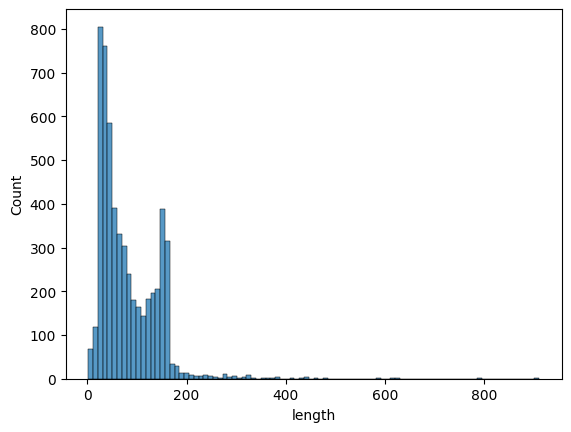

In [14]:
sns.histplot(messages['length'])

In [15]:
messages['length'].describe()

,length
count,5572.000000
mean,80.489950
std,59.942907
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


This graph shows that most messages are around 0 and 200 characters, the greater amount is around 50 to 70 characters. Our describe method shows that the mean of all of the length is of 80.

Here we can check the longest message that has 910 characters

In [16]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

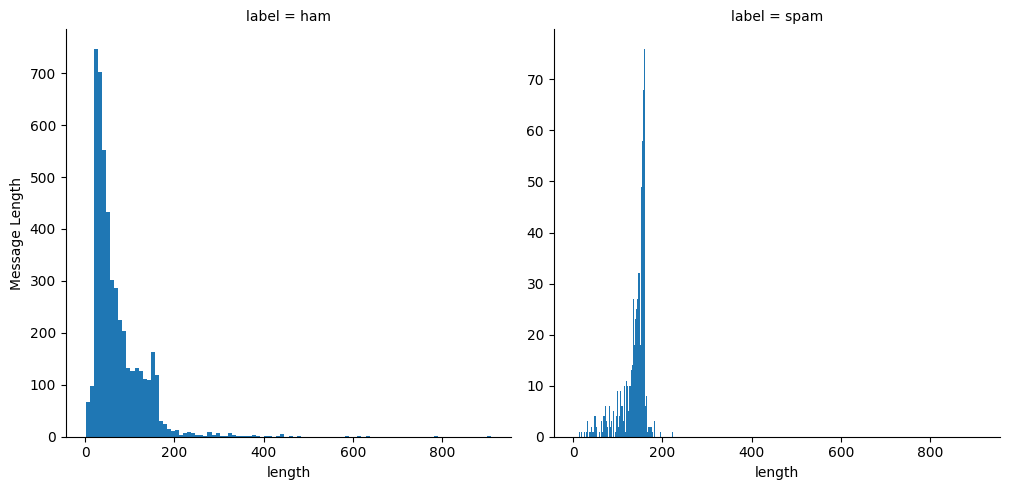

In [17]:
f = sns.FacetGrid(data=messages, col='label', height=5, aspect = 1, sharey=False)
f.map(plt.hist, 'length', bins=100)
f.set_ylabels('Message Length')

Calculate average length of spam messages

In [18]:
messages[messages['label']=='spam'].describe()

,length
count,747.000000
mean,138.670683
std,28.873603
min,13.000000
25%,133.000000
50%,149.000000
75%,157.000000
max,223.000000


Calculate average length of ham messages

In [19]:
messages[messages['label']=='ham'].describe()

,length
count,4825.000000
mean,71.482487
std,58.440652
min,2.000000
25%,33.000000
50%,52.000000
75%,93.000000
max,910.000000


# **Starting the NLP process**

---

After analysing the data, we can now start with the required procedure to treat these texts with our model.

## **Step 1: Text Preprocessing**

In [20]:
import string

### **Remove punctuation**

In [21]:
msg='Sample message! Notice: it has punctuation.'

In [22]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
nopunc = [char for char in msg if char not in string.punctuation]
nopunc = ''.join(nopunc)
nopunc

'Sample message Notice it has punctuation'

In [24]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

### **Stop Words Removal**

This will check each one of the words that the variable nopunc has after spliting it into words. Then it will remove capitalization and will check if the word is in the stopwords list. If the word is in that list, then it will be removed and we will end up with our message without punctuation and only the important words

In [25]:
#we are using the stopwords import of last time
clean_msg = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
clean_msg

['Sample', 'message', 'Notice', 'punctuation']

### **Create a function that removes stop words and punctuation**

---

After seeing how to do this, then we will create a function that does this automatically. The function will do the following:

1. Remove punctuation
2. Remove stopwords
3. Return a list of cleaned text words

In [26]:
def text_preprocess(message):
  nopunc = [char for char in message if char not in string.punctuation]
  nopunc = ''.join(nopunc)
  return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [27]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
messages['message'].head().apply(text_preprocess)

,message
0,"[Go, jurong, point, crazy, Available, bugis, n..."
1,"[Ok, lar, Joking, wif, u, oni]"
2,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,"[U, dun, say, early, hor, U, c, already, say]"
4,"[Nah, dont, think, goes, usf, lives, around, t..."


It is worth mentioning that we have already incurred into tokenization. Our words are separated and

## **Step 2: Text Normalization**

---

This process consists of reducing words to their base form for a better text analysis. There are different ways, such as stemming, which removes the sufixes or variations (e.g. Running -> Run), but this can end up in mistakes (e.g. flies -> fli). There is other way called lemming, which returns the word to its basic dictionary form.

In this practice we won't be doing this step, but it is a necessary and real step in these processes.

## **Step 3: Vectorization**

---

This process consists of turning these words into numerical values that the machine can understand. There are methods such as Bag of Words (BoW) for this purpose.

* **BoW**: This method consists in converting text to numerical forms by counting word occurrences, ignoring grammar and word order. Each unique word becomes a feature and documents are represented as vectors.
* **Sparse Matrix**: a type of table where most values are zero. In NLP documents are often represented as large matrixes where each row is a document and each column is a word. Each dot represents a nonzero value, showing how most of the matrix is empty. The reason it is so empty is because the message only uses some of the great amount of the words saved as features, leaving most of the matrix empty.


In [29]:
from sklearn.feature_extraction.text import CountVectorizer

This will check all messages and will become familiar with the whole dataset of messages and the vocabulary of them. We can see that we have 11425 different words with all this dataset.

In [30]:
bow_transformer = CountVectorizer(analyzer = text_preprocess).fit(messages['message'])

In [31]:
print(len(bow_transformer.vocabulary_))

11425


In [32]:
msg4 = messages['message'][3]
msg4

'U dun say so early hor... U c already then say...'

This goes ahead and applies the BoW technique to the message #4 and converts the words into numbers. It checks how many times a word is repeated and we can see this message has two ocurrences of the word #4069

In [33]:
bow4 = bow_transformer.transform([msg4])
print(bow4)
print(bow4.shape)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 7 stored elements and shape (1, 11425)>
  Coords	Values
  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


We can get the feature names from the vectorizer

In [34]:
feature_names = bow_transformer.get_feature_names_out()
nonzero_indices = bow4.nonzero()[1]

for index in nonzero_indices:
    word = feature_names[index]
    count = bow4[0, index]
    print(f"Word: {word}, Count: {count}")

Word: U, Count: 2
Word: already, Count: 1
Word: c, Count: 1
Word: dun, Count: 1
Word: early, Count: 1
Word: hor, Count: 1
Word: say, Count: 2


Now let's do the same thing for all of our messages.

In [48]:
messages_bow = bow_transformer.transform(messages['message'])

In [49]:
print('Shape of Sparse Matrix: ', messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


In [50]:
messages_bow.nnz

50548

After transforming the BoW we create this great matrix (or table) with all the messages and all the words and the result of messages_bow.nnz is the amount of occurrences.

Sparsity is the percentage of zero elements in a Matrix. The greater the sparsity is, the most empty spaces the matrix has. Since all of the messages only have a small amount of words in the vocabulary, then the sparsity is rather high.

In [51]:
sparsity = (messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1])) * 100
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


### **TF-IDF (Term Frequency - Inverse Document Frequency)**
---
It is a way to measure how important a word is in a document and highlights it agains the less important and common words. It is a kind of filter. These are some ways:
- **Term Frequency (TF):** counts how many times a word appears on a document. The more times it appears, the higher importance it has.
- **Inverse Document Frequency (IDF):** checks how rare a word is across all documents. If a word appears in many docs, then the word's importance is lower.


After this process, then we will go from 0s and 1s to a score of importance for each word. For achieving this, we will use TfidfTransformer

In [52]:
from sklearn.feature_extraction.text import TfidfTransformer

We create our instance and fit it to our vocab

In [53]:
tfidf_transfomer = TfidfTransformer().fit(messages_bow)

In our message 4 we can see that each of our words have a score

In [54]:
tfidf4 = tfidf_transfomer.transform(bow4)
print(tfidf4)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7 stored elements and shape (1, 11425)>
  Coords	Values
  (0, 4068)	0.4083258993338407
  (0, 4629)	0.2661980190608719
  (0, 5261)	0.2972995740586873
  (0, 6204)	0.2995379972369742
  (0, 6222)	0.31872168929491496
  (0, 7186)	0.4389365653379858
  (0, 9554)	0.5385626262927565


Now we add these scores to all of our messages

In [55]:
messages_tfidf = tfidf_transfomer.transform(messages_bow)

Now it's finally time to start training our model

## **Step 4 - Implementing the model**

We will be using the model Naïve Bayes model since it is:
- Fast and efficient
- Handles sparse data
- Good for small datasets
- Commonly used for sentiment analysis, spam filtering, etc.

In [56]:
from sklearn.naive_bayes import MultinomialNB

As always, we split our data

In [59]:
from sklearn.model_selection import train_test_split

In [61]:
messages.columns

Index(['label', 'message', 'length'], dtype='object')

In [62]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.3, random_state=101)

In [63]:
msg_train

,message
4028,"Yes, princess. Are you going to make me moan?"
1310,"Ok, be careful ! Don't text and drive !"
5469,Ok lor.
5375,I cant pick the phone right now. Pls send a me...
3814,Pls i wont belive god.not only jesus.
...,...
4171,"Mmmmmm ... I love you,so much, Ahmad ... I can..."
599,Will do. Was exhausted on train this morning. ...
1361,Yo dude guess who just got arrested the other day
1547,Shant disturb u anymore... Jia you...


### **Create a Data Pipeline**

We can see our messages are not preprocessed already, so we have to still process this data. In order to do so, we will learn to create a Data Pipeline.

Some features of a Data Pipeline are:
- Automates ML workflows
- Prevents data leakage
  - Learns transformations only from training data
  - Ensures that test data doesn't influence how features are transformed
- Keeps code clean and organized

In [64]:
from sklearn.pipeline import Pipeline

In this pipeline we do the following:
- Use the Bag of Words method to create our table with the vocab and occurrences (preprocessing and vectorization)
- Use the TfidTransfromer to set scores to the words based on importance
- Apply the NPL model

We have defined our pipeline

In [65]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_preprocess)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

Now, we will fit our pipeline to our training data

In [66]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_preprocess at 0x7ac7581be0c0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

Now we can make predictions, as usual

In [67]:
predictions = pipeline.predict(msg_test)

Now, we can make our evaluations

In [68]:
from sklearn.metrics import classification_report

In [69]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1475
        spam       1.00      0.65      0.79       197

    accuracy                           0.96      1672
   macro avg       0.98      0.83      0.88      1672
weighted avg       0.96      0.96      0.96      1672



We can conclude that our model is working quite good since the precision is great for detecting spam in most cases.